In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [3]:
df = pd.merge(city_data, ride_data, on = "city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
df_urban = df.loc[df["type"] == "Urban", :]
df_suburban = df.loc[df["type"] == "Suburban", :]
df_rural = df.loc[df["type"] == "Rural", :]

In [5]:
df_urban_g = df_urban.groupby(["city"])
urban_rides = df_urban_g["ride_id"].count()
urban_average = df_urban_g["fare"].mean()
urban_drivers = df_urban_g["driver_count"].sum()

In [6]:
df_suburban_g = df_suburban.groupby(["city"])
suburban_rides = df_suburban_g["ride_id"].count()
suburban_average = df_suburban_g["fare"].mean()
suburban_drivers = df_suburban_g["driver_count"].sum()

In [7]:
df_rural_g = df_rural.groupby(["city"])
rural_rides = df_rural_g["ride_id"].count()
rural_average = df_rural_g["fare"].mean()
rural_drivers = df_rural_g["driver_count"].sum()

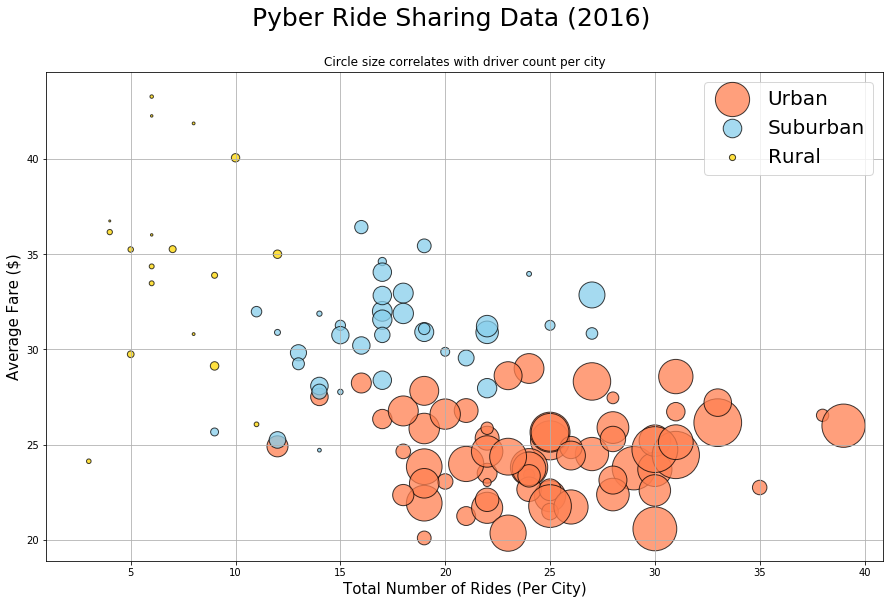

In [29]:
plt.scatter(urban_rides, urban_average, s = urban_drivers, facecolors = "coral", edgecolors = "black", alpha = 0.75, label = "Urban") 
fig = plt.gcf()

ax2 = fig.add_subplot(111)
ax2.scatter(suburban_rides, suburban_average, s = suburban_drivers, facecolors = "skyblue", edgecolors = "black", alpha = 0.75, label = "Suburban")

ax3 = fig.add_subplot(111)
ax3.scatter(rural_rides, rural_average, s = rural_drivers, facecolors = "gold", edgecolors = "black", alpha = 0.75, label = "Rural")

fig.set_size_inches(15, 9)
plt.ylabel("Average Fare ($)", fontsize = 15)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 15)
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize = 25)
plt.legend(loc = "upper right", prop = {"size" : 20})
plt.title("Circle size correlates with driver count per city")
plt.savefig("Sharing_data.svg", format = "svg")
plt.grid()
plt.show()

In [10]:
total_fare_urban = df_urban["fare"].sum()
total_fare_suburban = df_suburban["fare"].sum()
total_fare_rural = df_rural["fare"].sum()

In [11]:
pie_fares = [total_fare_urban, total_fare_suburban, total_fare_rural]
pie_colors = ["coral", "skyblue", "gold"]
pie_labels = ["Urban", "Suburban", "Rural"]
pie_explode = (0.1, 0, 0)

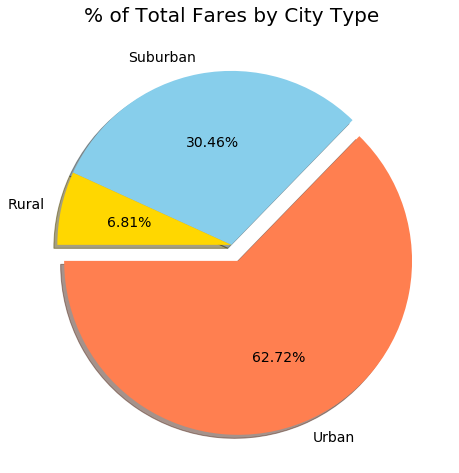

In [30]:
plt.pie(pie_fares, colors = pie_colors, labels = pie_labels, shadow = True,
        autopct = "%1.2f%%", explode = pie_explode, startangle = 180,
        textprops={'fontsize': 14})
fig2 = plt.gcf()
fig2.set_size_inches(14, 8)
plt.title("% of Total Fares by City Type", fontsize = 20)
plt.savefig("total_fares.svg", format = "svg")
plt.show()

In [14]:
total_rides_urban = df_urban["ride_id"].count()
total_rides_suburban = df_suburban["ride_id"].count()
total_rides_rural = df_rural["ride_id"].count()

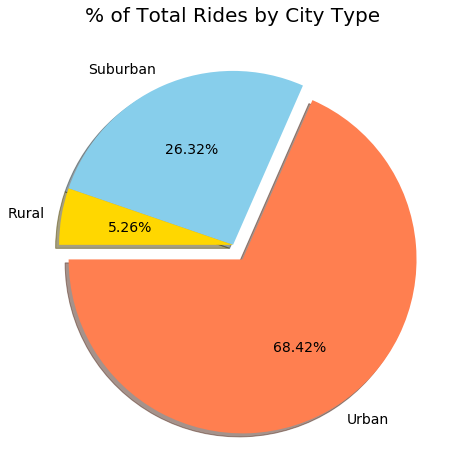

In [31]:
pie_rides = [total_rides_urban, total_rides_suburban, total_rides_rural]
plt.pie(pie_rides, colors = pie_colors, labels = pie_labels, shadow = True,
        autopct = "%1.2f%%", explode = pie_explode, startangle = 180,
        textprops={'fontsize': 14})
fig3 = plt.gcf()
fig3.set_size_inches(14, 8)
plt.title("% of Total Rides by City Type", fontsize = 20)
plt.savefig("total_rides.svg", format = "svg")
plt.show()

In [20]:
total_drivers_urban = df_urban["driver_count"].sum()
total_drivers_suburban = df_suburban["driver_count"].sum()
total_drivers_rural = df_rural["driver_count"].sum()

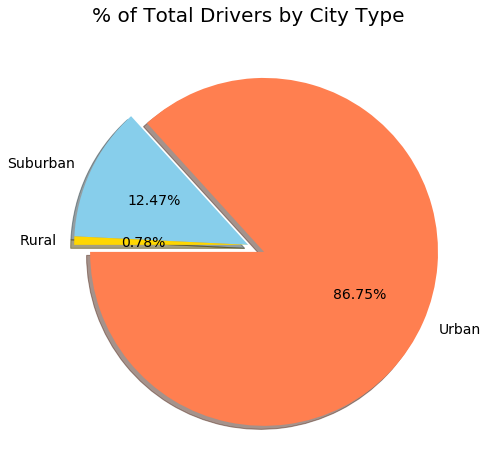

In [32]:
pie_drivers = [total_drivers_urban, total_drivers_suburban, total_drivers_rural]
plt.pie(pie_drivers, colors = pie_colors, labels = pie_labels, shadow = True,
        autopct = "%1.2f%%", explode = pie_explode, startangle = 180,
        textprops={'fontsize': 14})
fig4 = plt.gcf()
fig4.set_size_inches(14, 8)
plt.title("% of Total Drivers by City Type", fontsize = 20)
plt.savefig("total_drivers.svg", format = "svg")
plt.show()